# TP Titanic

## Consignes

- Analyse des données du Titanic
- Un modèle directement interprétable
- Un modèle non interprétable directement **mais** l’utilisation d’une librairie au choix
- Utilisation d’une technique de Vigilance au biais

## Evaluation

Fond :
- Pertinence des analyses
- Qualité du code
- Maitrise des techniques de DS

Forme :
- Clarté des explications
- Qualité des illustrations (graphs, figures…)
- Cohérence de l’histoire racontée

##### Analyse des données du Titanic (A supprimer avant de rendre)

D'après cours de Nicolas Rochet, pour commencer : 

Nettoyage minimal des données
- Gestion des doublons et format de données
- Gestion des donnnées manquantes
- Gestion des données abérantes (outliers)

Etapes de préparation souvent nécessaires
- Encodage des données catégorielles
- Scaling des données
- Equilibrage des données
- Discrétisation des données

Etapes visant à améliorer l'information contenue dans le dataset
- Création de features
- Sélection de features

In [1]:
#importer les librairies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Importer les données

In [2]:
data = pd.read_csv("C:/Users/sophi/Desktop/DESU Data analyse appliquée aux Neurosciences/Devoir Titanic/Data_Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Explorer les données

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print (data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

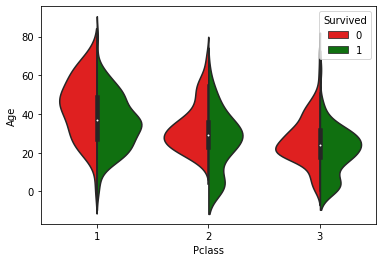

In [7]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', split=True, data=data, palette={0 : "r", 1 : "g"})

* Visulisation et nettoyage des données

In [8]:
data.duplicated().sum() #pas de doublons !

0

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

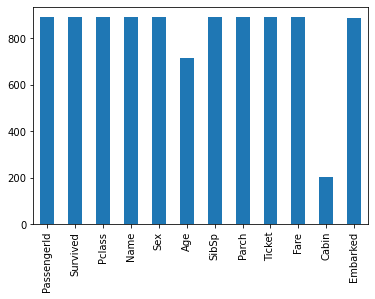

In [10]:
data.count().plot(kind='bar')
#La colonne cabin a vraiment peu de valeurs (beaucoup de NaN)
#La colonne age a également des valeurs manquantes (moins que cabin)

    - Remplacer les valeurs manquantes et convertir en valeurs numériques

1) Colonne Cabin

In [11]:
#colonne cabin : valeur manquante = pas de cabine, numéro de cabin disponible = cabine -> binaire
data['Cabin'].loc[data['Cabin'].notnull()]=1
data.head()

C:\Users\sophi\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data['Cabin'].fillna(0, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [13]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,1,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,0,Q


<AxesSubplot:>

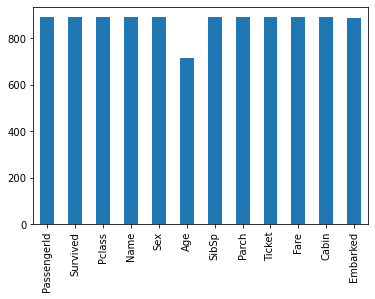

In [14]:
data.count().plot(kind='bar')

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

2) Colonnes Age et Embarked

-- 177 valeurs manquantes pour l'âge, ce serait dommage de supprimer autant de données, plutôt imputer les valeurs d'âge manquantes. Seules deux valeurs manquantes pour embarked, imputable aussi.

-- Plusieurs méthodes possibles : simple imputer, iterative imputer, kNN imputer

In [16]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

Difficilement transformer chaque nom en valeur numérique sans perdre l'information de l'écriture du nom et à priori le numéro de ticket etl'Id ne codent pas d'information particulière. Pour l'instant, je supprime ces colonnes.

In [17]:
data=data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

Transformation de toutes les valeurs en type numérique puis imputation à tout le dataframe
Deux colonnes à transformer : sexe et embarked. Fonction get_dumies

In [18]:
Colonnes = data[['Sex', 'Embarked']]
ColonnesConverties = pd.get_dummies(Colonnes, drop_first=True)

In [19]:
ColonnesConverties.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [20]:
data = data.drop(['Sex', 'Embarked'], axis=1)
data = pd.concat([data, ColonnesConverties], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [21]:
data.tail() # 888 : age=Nan

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
886,0,2,27.0,0,0,13.00,0,1,0,1
887,1,1,19.0,0,0,30.00,1,0,0,1
888,0,3,NaN,1,2,23.45,0,0,0,1
889,1,1,26.0,0,0,30.00,1,1,0,0
890,0,3,32.0,0,0,7.75,0,1,1,0


In [22]:
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

<AxesSubplot:>

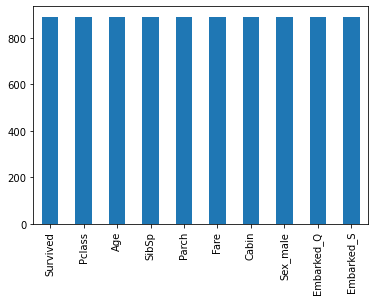

In [23]:
data.count().plot(kind='bar')

In [24]:
data.tail()#age de 888 n'est plus un Nan

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
886,0.0,2.0,27.0,0.0,0.0,13.00,0.0,1.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,30.00,1.0,0.0,0.0,1.0
888,0.0,3.0,20.0,1.0,2.0,23.45,0.0,0.0,0.0,1.0
889,1.0,1.0,26.0,0.0,0.0,30.00,1.0,1.0,0.0,0.0
890,0.0,3.0,32.0,0.0,0.0,7.75,0.0,1.0,1.0,0.0


In [25]:
data.isna().sum() #plus de nan !

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

aide : https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

    - Rechercher et traiter les outliers

https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893

https://github.com/deepaligarg/Titanic-Outlier-Detection/blob/master/TitanicDS_OutlierDiscussion_StdDev_IQR.ipynb

In [26]:
print (data.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


Parmis ces colonnes, celles susceptibles de contenir des outliers sont Age, Fare, peut-être SibSp ( nombre de frères et soeurs à bord) et Parch (nombre d'enfants/parents à bord)

<AxesSubplot:>

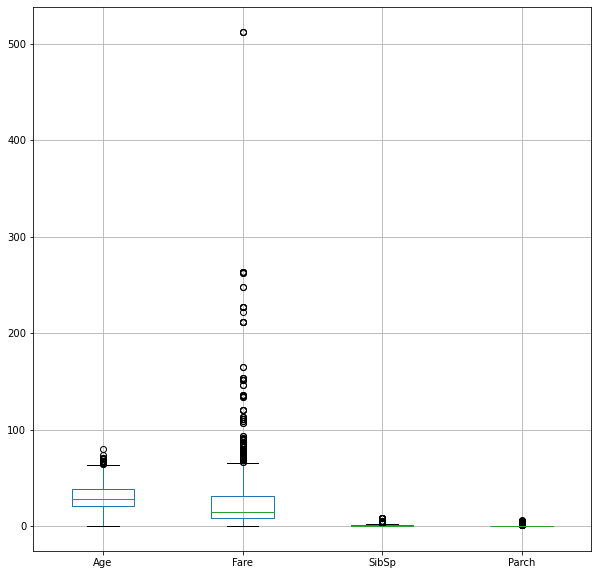

In [27]:
#visualisation
data.boxplot(column=['Age','Fare','SibSp','Parch'], figsize=(10,10))

<AxesSubplot:>

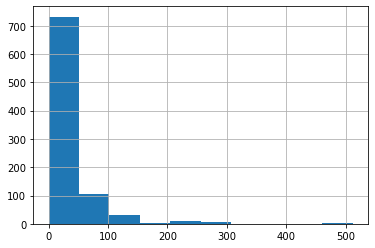

In [28]:
data['Fare'].hist()

<AxesSubplot:>

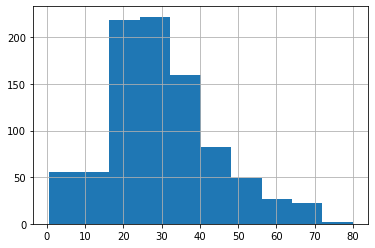

In [29]:
data['Age'].hist()

<AxesSubplot:>

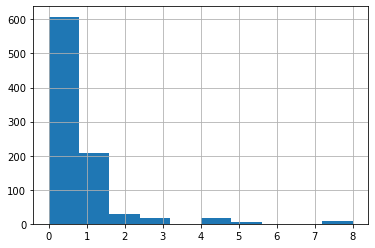

In [30]:
data['SibSp'].hist()

<AxesSubplot:>

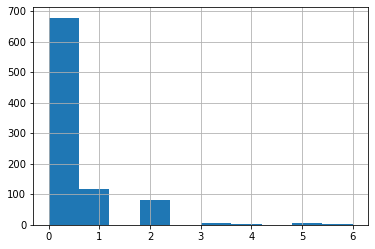

In [31]:
data['Parch'].hist()

Beaucoup de valeurs au dessus du critère de tukey pour colonnes Age et surtout Fare.
Soit supprimer et remplacer valeurs manquantes, soit on  garde car peuvent être finalement une source d'information et on utilise plutôt des méthodes robustes aux outliers (utilisation de régularisation) tel que regression ridge et lasso (cours Nicolas Rochet)

Visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

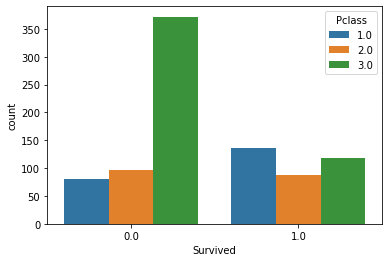

In [32]:
sns.countplot(x='Survived', hue='Pclass', data=data)

**Séparation dataset entrainement et dataset test**

In [33]:
X = data.drop('Survived', axis=1)
y= data['Survived']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Test de modèles**

**Régression logistique**

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logistic_regression = LogisticRegression()

In [37]:
lr = logistic_regression.fit(X_train, y_train)

C:\Users\sophi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
y_pred = logistic_regression.predict(X_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1.])

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
accuracy_score(y_test, y_pred)

0.8268156424581006

In [41]:
y_test.shape

(179,)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       105
         1.0       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [45]:
LR_confusion_matrix = confusion_matrix(y_test, y_pred)
print (LR_confusion_matrix)

[[90 15]
 [16 58]]


<AxesSubplot:>

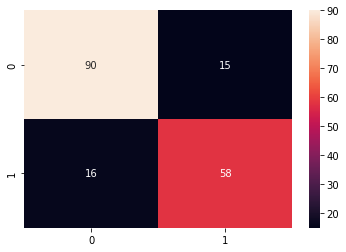

In [47]:
sns.heatmap(LR_confusion_matrix, annot=True)

Interprétation :

    Vrai positif 90
    Vrai négatif 58
    Faux positif 16
    Faux negatif 15

**Interprétabilité**

Les attributs du LogisticRegression sont les suivants :

- coef_ : renvoi le coefficient des caractéristiques de la fonction de décision.

- intercept_ : représente la constante ajoutée à la fonction de décision.

- n_iter_ : renvoi le nombre réel d’itérations pour chaque classe.

In [76]:
lr.coef_

array([[-5.15771219e-01, -2.84672837e-02, -2.39017160e-01,
        -2.60141609e-02,  1.55097182e-03,  1.18670494e+00,
        -2.21361547e+00,  3.07395036e-03, -3.51359307e-01]])

In [77]:
lr.intercept_

array([2.91094643])

In [78]:
lr.n_iter_

array([100])

**Arbre de décision**

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
decision_tree = DecisionTreeClassifier(max_depth=2)

In [81]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [82]:
tree_prediction = decision_tree.predict(X_test)

In [83]:
y_val = decision_tree.predict(X_train)
accuracy_score(y_train, y_val)

0.8033707865168539

In [84]:
decision_tree.score(X_test,y_test)

0.7653631284916201

In [85]:
accuracy_score(y_test, tree_prediction)

0.7653631284916201

In [86]:
confusion_matrix(y_test, tree_prediction)

array([[100,   5],
       [ 37,  37]], dtype=int64)

In [87]:
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83       105
         1.0       0.88      0.50      0.64        74

    accuracy                           0.77       179
   macro avg       0.81      0.73      0.73       179
weighted avg       0.79      0.77      0.75       179



[Text(334.8, 543.6, 'X[6] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(167.4, 326.16, 'X[0] <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]'),
 Text(83.7, 108.72000000000003, 'gini = 0.074\nsamples = 130\nvalue = [5, 125]'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.5\nsamples = 115\nvalue = [59, 56]'),
 Text(502.20000000000005, 326.16, 'X[1] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(418.5, 108.72000000000003, 'gini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(585.9, 108.72000000000003, 'gini = 0.271\nsamples = 445\nvalue = [373, 72]')]

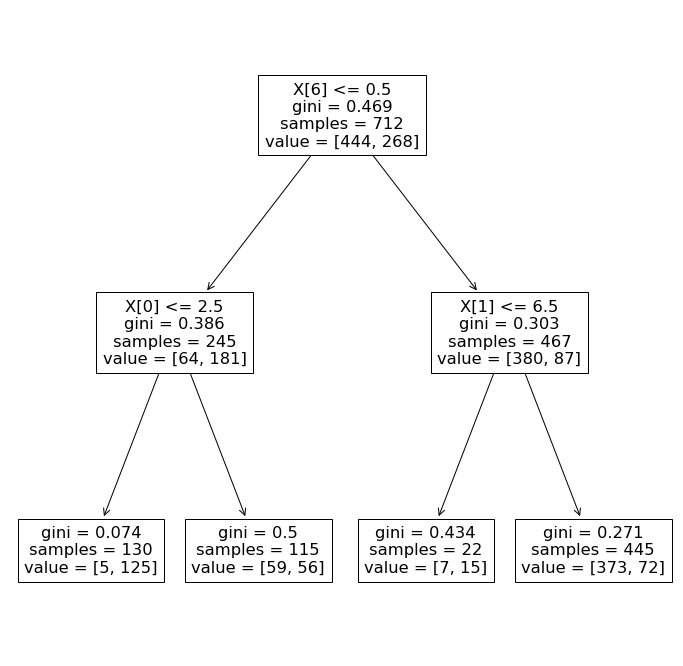

In [88]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 12))
tree.plot_tree(decision_tree) 

**Random forest**

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
RF = RandomForestClassifier(max_depth=10, n_estimators = 100)

In [91]:
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [92]:
rf_prediction = RF.predict(X_test)

In [93]:
accuracy_score(y_test, rf_prediction)

0.8491620111731844

In [95]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       105
         1.0       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [111]:
RF_confusion_matrix = confusion_matrix(y_test, rf_prediction)

TypeError: 'numpy.ndarray' object is not callable

In [113]:
sns.heatmap(RF_confusion_matrix, annot=True)

NameError: name 'RF_confusion_matrix' is not defined

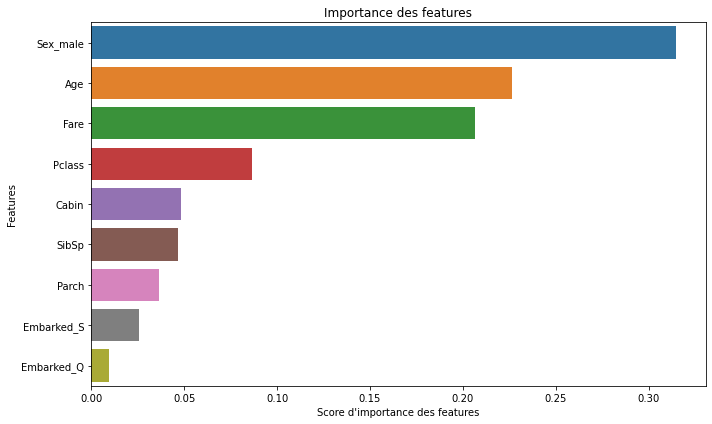

In [103]:
FeatureImportance = pd.Series(RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=FeatureImportance, y=FeatureImportance.index)
# Légendes et apparence
plt.xlabel("Score d'importance des features")
plt.ylabel('Features')
plt.title("Importance des features")
plt.tight_layout()

**Réseau de neurones**

In [205]:
from sklearn.neural_network import MLPClassifier

In [206]:
MLPC = MLPClassifier(hidden_layer_sizes=(10,20))

In [207]:
MLPC.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [208]:
prediction = MLPC.predict(X_test)
accuracy_score(y_test, prediction)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [209]:
confusion_matrix(y_test, prediction)

array([[87, 18],
       [24, 50]], dtype=int64)

In [210]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       105
           1       0.74      0.68      0.70        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



**Cross validation**

In [211]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic_regression, X, y, cv=5)
print ('Cross validation - Régression logistique :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Régression logistique :
scores =  [nan nan nan nan nan]
score moyen = nan


Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1344, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\validation.py"

In [212]:
scores = cross_val_score(decision_tree, X, y, cv=5)
print ('Cross validation - Arbre de décision :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 157, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 720, in check_array
    _assert_all_finite(array,
  File "C:\Users\sophi\anaconda3\l

Cross validation - Arbre de décision :
scores =  [nan nan nan nan nan]
score moyen = nan


Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 157, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 720, in check_array
    _assert_all_finite(array,
  File "C:\Users\sophi\anaconda3\l

In [213]:
scores = cross_val_score(RF, X, y, cv=5)
print ('Cross validation - Random forest :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Random forest :
scores =  [nan nan nan nan nan]
score moyen = nan


Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
 

In [214]:
scores = cross_val_score(MLPC, X, y, cv=5)
print ('Cross validation - Réseau de neurones :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Réseau de neurones :
scores =  [nan nan nan nan nan]
score moyen = nan


Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 971, in _validate_input
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc'],
  File "C:\Users\sophi\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check

**Interprétabilité**

**Librairie Lime, interprétabilité random forest classifier**

site source : 
https://betterdatascience.com/lime/

In [215]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [216]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0, 1],
    mode='classification'
)

In [217]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=RF.predict_proba
)

exp.show_in_notebook(show_table=True)

ValueError: Domain error in arguments.

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[4], 
    predict_fn=RF.predict_proba
)

exp.show_in_notebook(show_table=True)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[6], 
    predict_fn=RF.predict_proba
)

exp.show_in_notebook(show_table=True)

**Librairie Lime, interprétabilité réseau de neurones**

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=MLPC.predict_proba
)

exp.show_in_notebook(show_table=True)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[4], 
    predict_fn=MLPC.predict_proba
)

exp.show_in_notebook(show_table=True)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[6], 
    predict_fn=MLPC.predict_proba
)

exp.show_in_notebook(show_table=True)

**Librairie Shap**

In [ ]:
#pip install shap

In [ ]:
#import shap

#explainer = shap.TreeExplainer(RF)
#shap_values = explainer.shap_values(X)

In [218]:
#shap.force_plot(explainer.expected_value[1], shap_values[1], X)

In [219]:
#shap.force_plot(explainer.expected_value[0], shap_values[1], X)

Librairie ELI5

In [220]:
#pip install eli5

**Librairies de vigilance aux biais**

https://towardsdatascience.com/mitigating-bias-in-ai-with-aif360-b4305d1f88a9

Evaluer le biais

In [221]:
#print (data['Survived'].value_counts())

Utilisation librairie de vigilance aux biais : AI fairness 360

AIF360 : librairie pour détecter et atténuer les biais

In [222]:
pip install aif360

Note: you may need to restart the kernel to use updated packages.


In [223]:
import aif360
from  aif360.datasets  import  BinaryLabelDataset   # Pour convertir les données?  exigé par aif360
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

Convertir les données

In [224]:
BinaryTrainData = BinaryLabelDataset(df=pd.concat((X_train, y_train),
                                               axis=1),
                                  label_names=['Survived'],
                                  protected_attribute_names=['Sex_male'],
                                  favorable_label=0,
                                  unfavorable_label=1)

privileged_groups = [{'Sex_male': 0}]
unprivileged_groups = [{'Sex_male': 1}]

ValueError: Input DataFrames cannot contain NA values.

In [225]:
BinaryTestData = BinaryLabelDataset(df=pd.concat((X_test, y_test),
                                               axis=1),
                                  label_names=['Survived'],
                                  protected_attribute_names=['Sex_male'],
                                  favorable_label=0,
                                  unfavorable_label=1)

privileged_groups = [{'Sex_male': 0}]
unprivileged_groups = [{'Sex_male': 1}]

ValueError: Input DataFrames cannot contain NA values.

Métriques

Dataset metrics are used to determine bias in
the instances of a dataset. Mean Difference (MD) is a dataset metric
which computes differences between privileged and unprivileged
group in regards to how likely it is that they receive a favourable
treatment (i.e., a positive label).

        𝑀𝐷 = 𝑃𝑟 (𝑦 = 1|𝐷 = 𝑢𝑛𝑝𝑟𝑖𝑣𝑖𝑙𝑒𝑔𝑒𝑑) −𝑃𝑟 (𝑦 = 1|𝐷 = 𝑝𝑟𝑖𝑣𝑖𝑙𝑒𝑔𝑒𝑑)

It's the difference in mean outcomes when the data is split by the un/privileged groups we defined. If it's not 0, one group has better outcomes that the other

In [226]:
metric_orig_train = BinaryLabelDatasetMetric(BinaryTrainData, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())
metric_orig_test = BinaryLabelDatasetMetric(BinaryTestData, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_test.mean_difference())

Train set: Difference in mean outcomes between unprivileged and privileged groups = 0.552480
Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.553623


Donc dans dataset train et test : male non privilégié car score différent de 0 , comment corriger?

Reweighing

In [227]:
rw = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
BinaryTrainData_f = rw.fit_transform(BinaryTrainData)

Nouveau poids attribués pour chaque personne afin de compenser le privilège de survie attribué aux femmes

In [228]:
Data2 = {'Sex': [X_train.Sex_male], 'Survived': [y_train], 'Original_weight': [np.ones(shape=(X_train.shape[0],))], 'new_weight': [BinaryTrainData_f.instance_weights]}
df = pd.DataFrame (Data2)
df.head()

TypeError: 'dict' object is not callable

In [229]:
pd.DataFrame({'Sex': X_train.Sex_male,
              'Survived': y_train,
              'Original_weight': np.ones(shape=(X_train.shape[0],)),
              'new_weight': BinaryTrainData_f.instance_weights}).sample(15)

TypeError: 'dict' object is not callable